## 시계열 데이터 분석
데이터주무르기책 7장  
프로그램 설치
- conda install -c anaconda pandas-datareader
- conda install -c conda-forge pystan
- conda install -c conda-forge fbprophet
- conda install -c plotly plotly

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
#라이브러리 워닝내뱉는거 막으려고 ignore ???
import warnings
warnings.filterwarnings("ignore")

예측하는데 사용하는방법이 회귀식  
산점도를 대표할 수 있는 직선,곡선을 회귀선 리그레이션?이라한다.   
선형대수학에서 사용하는 방법이 있음  
또 통계분석할 때 선형회귀식은 또 나온다;;   
대표적 회귀식에 나오는 예제 보스턴집값; (열가지이상의 항목이있다)  

회귀식에는 변수가있다.  
독립변수1개뿐인건 예측하기 편한데,  
독립변수가 2개이상인것 100개등등. 다중회귀라고한다.  
넘파이의 폴리핏  
## 회귀(Regression) 분석하기 - Numpy polyfit

In [3]:
#pinkwink블로그 방문자수기록해둔 CSV파일/ 앞으로 얼마나 많은 사람들이 방문할것인가 예측해보자..;;;
pinkwink_web = pd.read_csv('./data/PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',  #천단위의 읽을때 잘읽어야 
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


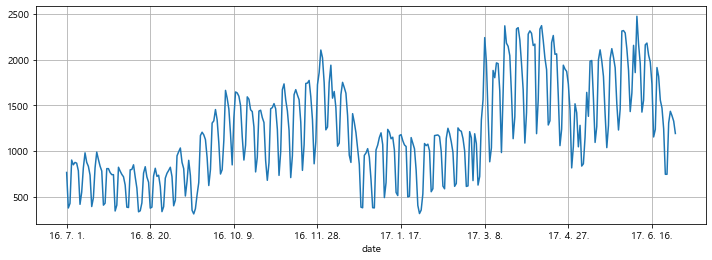

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)
plt.show()

In [5]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)  #linspace 시작부터 끝까지 1000단위로 나눔 

## Mean Squared Error
민스퀘어에러 이걸로 판단을 함  
def 원래함수 y가 있고 ( ) 차이가 에러?    

In [21]:
# Mean Squared Error: 
def mse(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2)) #항상에러제곱을해서 mean Squared스퀘어 에러구하는 함수/ 머신러닝할때 중요
    #원래값이있는데 학습을 시켜서 원래값을 유추할수있는 모델을만들어내는것이 인공지능 
    #(식을 만드는건 회귀식)f
    #예측한값에서 ( ) 제곱을하고 더해서 평균을 내는 / 평균값이 최소화가 됐을때, 어떠한것을 잘 표현하고있다???눼?
    #f(x)는 천개의 데이터를 가지고있다.  식하나, 값하나가 아니라 ! 한방에 들어가는게 넘파이!!!

In [7]:
# 1차식으로 회귀식을 구하고, MSE 값을 계산..271p
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
mse(f1, time, traffic)

430.85973081109626

In [8]:
# 2차식으로 회귀식을 구하고, MSE 값을 계산..1차식이나 2차식이나 결과값 별 차이가없다
f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)
mse(f2, time, traffic)

430.62841018946943

In [9]:
# 3차식으로 회귀식을 구하고, MSE 값을 계산..3차식도 별로 차이가없다 ㅋㅋ
f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)
mse(f3, time, traffic)

429.5328046676293

In [10]:
# 15차식으로 회귀식을 구하고, MSE 값을 계산..오~차이가 좀 난다만 몇차식까지 할것인가??
f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)
mse(f15, time, traffic)

330.4777304274343

In [11]:
#포룩으로 30차식까지 해보자. n으로 
for n in range(1, 31):
    fnp = np.polyfit(time, traffic, n)
    fn = np.poly1d(fnp) # (fnp) 요기n
    print(f'{n}차일 경우 MSE: {mse(fn, time, traffic)}') # {mse(fn, 요기n
#차수가 올라갈수록 좋아보이지만..
#주의: 차수만 올리면 미세하게 변곡점이 생겨서(변화구간이 많아서) 나중에..궁극적으로..과적합;; 오버핏팅overfitting발생;;
#오히려 정확도가 떨어지는것.. 과적합!! 주의주의
#테스트셋 뭔셋 두개를 분리해서 언제멈춰야하는지나온다 ; 그때그때 달라요; 적당한선에서 잘라줘야함

1차일 경우 MSE: 430.85973081109626
2차일 경우 MSE: 430.62841018946943
3차일 경우 MSE: 429.5328046676293
4차일 경우 MSE: 423.5828148341961
5차일 경우 MSE: 389.8483612021829
6차일 경우 MSE: 385.40591940643094
7차일 경우 MSE: 376.0837527243637
8차일 경우 MSE: 361.83792091115043
9차일 경우 MSE: 347.7570709151062
10차일 경우 MSE: 346.33133580877166
11차일 경우 MSE: 341.38530813728266
12차일 경우 MSE: 332.4400772180358
13차일 경우 MSE: 330.72224379943356
14차일 경우 MSE: 330.5615447799965
15차일 경우 MSE: 330.4777304274343
16차일 경우 MSE: 327.5879537208797
17차일 경우 MSE: 327.0648810803929
18차일 경우 MSE: 327.25504866050477
19차일 경우 MSE: 321.8089707524151
20차일 경우 MSE: 321.8475173410411
21차일 경우 MSE: 321.6649086950498
22차일 경우 MSE: 321.3585975860227
23차일 경우 MSE: 321.03557644047413
24차일 경우 MSE: 320.658345905134
25차일 경우 MSE: 320.7840361671954
26차일 경우 MSE: 320.79833328420676
27차일 경우 MSE: 320.75213047219864
28차일 경우 MSE: 320.5672161058456
29차일 경우 MSE: 320.72107164379054
30차일 경우 MSE: 320.70879654768487


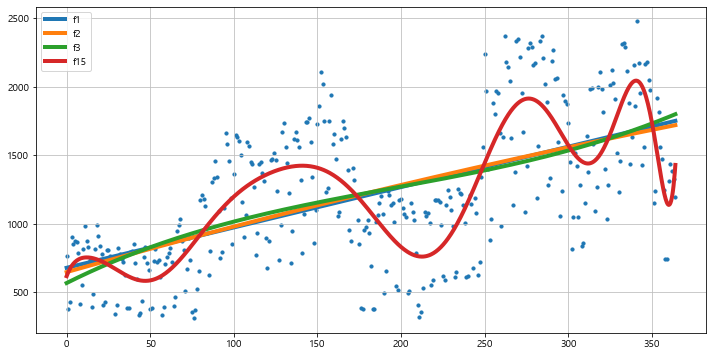

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

# 1.2.3.15차 회귀식을 산점도로 뿌려봄
# 위 데이터 지그재그 선이 점으로 뿌려지고
# 1,2,3차식은 직선
# 15차식은 빨간곡선 오차가 줄었구나... 가 눈에 보인다고??
# 넘파이에있는 폴리핏을 이용한 회귀를 분석해봤다ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ???

위는 넘파이의 폴리핏이용한거고 (식으로 표현)  
prophet프라핏모듈을 이용 _ 머신러닝의 모델이 됩니다.(블랙박스로 표현) 학습을 함. 
## Prophet 모듈

In [13]:
from fbprophet import Prophet
from datetime import datetime

In [14]:
#모듈에 데이터를 주기위해 / ds 데이터셋 / y는 히트수
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']
df.head()
#시간에 따른 히트수를가지고 데이터프레임을 만들었다

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


## 이걸 어떻게 사용할까?

In [15]:
# Prophet 모델의 하이퍼 파라메터 설정
model = Prophet(yearly_seasonality=True, daily_seasonality=True) #어떠한 기능을 갖출것인가?  연단위 시즌으로 ?
#model = prophet모델을 만들어냅니다. / 하이퍼파라메타를 줄 수 있다./이걸 주고 조성하는게 우리가 하는일.
#10가지~30가지 하이퍼파라메타에 따른 모델이 어떻게 나오느냐, 모델의 성능이 정해짐

In [16]:
# 모델 학습 만국공통 ㅋㅋㅋ 학습하라! fit
model.fit(df)
#결과값:  INFO:numexpr.utils:NumExpr defaulting to 4 threads. 
#결과값 4가지를 학습했다라는것.  사이트런에 fit을 썼다; 메소드이름이 fit

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [17]:
#  예측을 하기위해서 60일간데이터를 만들다?
future = model.make_future_dataframe(periods=60)
future.tail() #1년치 학습했으니까 60일치를 예견해봐~!

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [18]:
# 예측하기 - predict
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#내가 예측한값이 yhat. 내가 단일한값을 예측하면 좋겠지만... 신뢰도를 위해서 로우와 어퍼를 함께(하한선,상한선 95%신뢰수준;) 월남뽕? ㅋㅋ 네???ㅋㅋ

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,677.417745,1105.392949
421,2017-08-26,481.544412,290.022198,687.580171
422,2017-08-27,614.212001,415.064502,817.712173
423,2017-08-28,1166.966207,952.467469,1382.747589
424,2017-08-29,1203.000155,991.131472,1396.832226


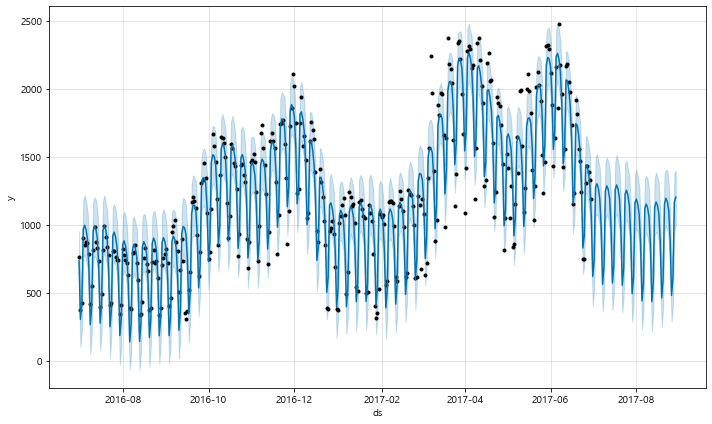

In [23]:
model.plot(forecast); #; 꼭 세미콜론을 붙여야 그래프가 1개 나옴
#상한 하안을 찍어주는 쩜은 데이터/ 이후가 예측한것.

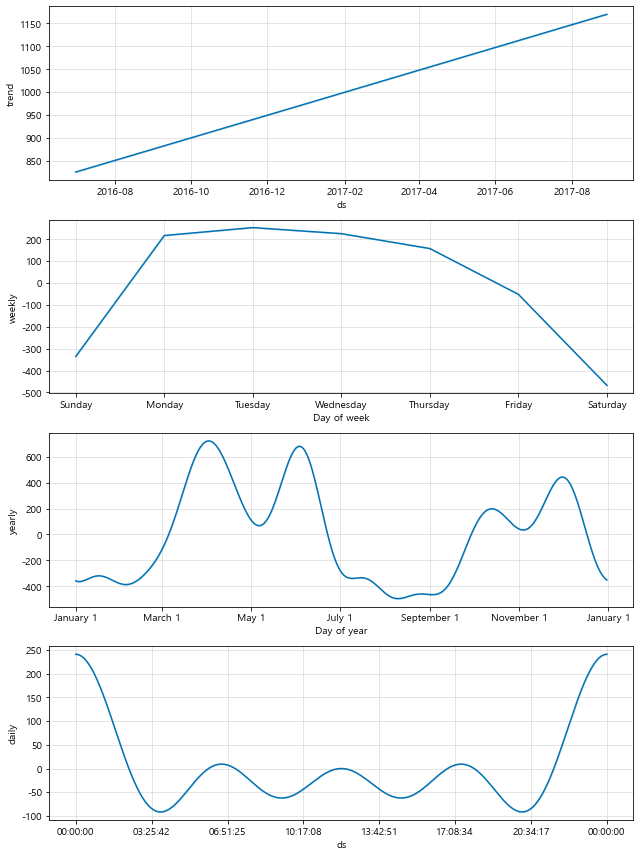

In [20]:
model.plot_components(forecast);
#두번째 주간그래프는 평일에만 공부한다;
#세번째 월그래프는 중간고사, 기말고사에만 피크!! 낮은기간은 방학이다 ㅋㅋ